In [3]:
"""
Clasificar las plantas Iris
"""

########## LIBRERÍAS A UTILIZAR ##########

import numpy as np
import pandas as pd

########## IMPORTAMOS LOS DATOS ##########

#Importamos el dataset para iniciar el análisis
iris = pd.read_csv("Iris.csv")

#Visualizamos los primeros 5 datos del dataset
print(iris.head())


   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [8]:
#Eliminamos la primera columna ID
#iris = iris.drop('Id',axis=1)
#print(iris.head())

########## ANALIZAMOS LOS DATOS ##########

#Análizamos los datos que tenemos disponibles
print('Información del dataset:')
print(iris.info())

print('Descripción del dataset:')
print(iris.describe())

print('Distribución de las especies de Iris:')
print(iris.groupby('variety').size())



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
Descripción del dataset:
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max     

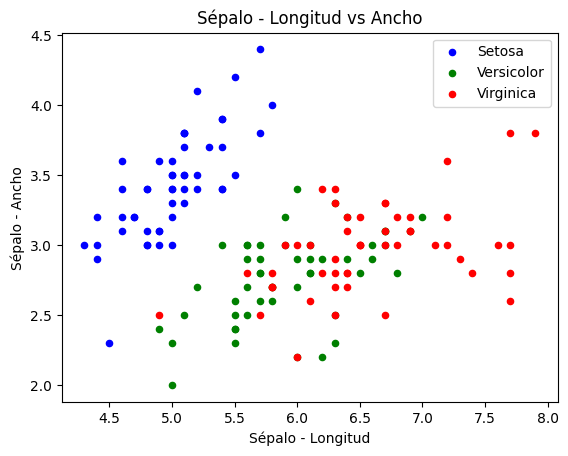

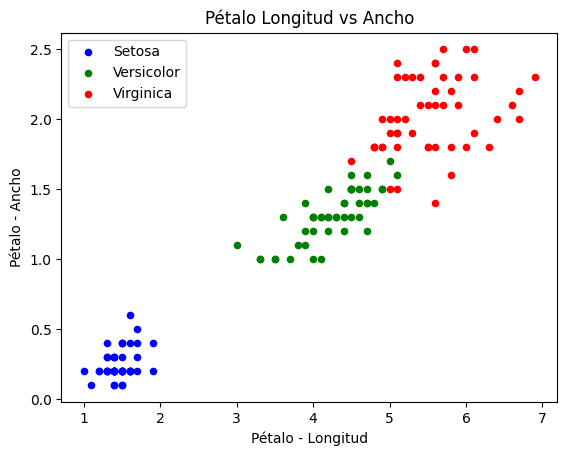

In [11]:
########## VISUALIZAMOS LOS DATOS ##########

import matplotlib.pyplot as plt

#Grafico Sepal - Longitud vs Ancho
fig = iris[iris.variety == 'Setosa'].plot(kind='scatter',
          x='sepal.length', y='sepal.width', color='blue', label='Setosa')
iris[iris.variety == 'Versicolor'].plot(kind='scatter',
    x='sepal.length', y='sepal.width', color='green', label='Versicolor', ax=fig)
iris[iris.variety == 'Virginica'].plot(kind='scatter',
    x='sepal.length', y='sepal.width', color='red', label='Virginica', ax=fig)

fig.set_xlabel('Sépalo - Longitud')
fig.set_ylabel('Sépalo - Ancho')
fig.set_title('Sépalo - Longitud vs Ancho')
plt.show()

#Grafico Pétalo - Longitud vs Ancho
fig = iris[iris.variety == 'Setosa'].plot(kind='scatter',
          x='petal.length', y='petal.width', color='blue', label='Setosa')
iris[iris.variety == 'Versicolor'].plot(kind='scatter',
    x='petal.length', y='petal.width', color='green',
    label='Versicolor', ax=fig)
iris[iris.variety == 'Virginica'].plot(kind='scatter',
    x='petal.length', y='petal.width', color='red', label='Virginica', ax=fig)

fig.set_xlabel('Pétalo - Longitud')
fig.set_ylabel('Pétalo - Ancho')
fig.set_title('Pétalo Longitud vs Ancho')
plt.show()



In [14]:
########## APLICACIÓN DE ALGORITMOS DE MACHINE LEARNING ##########

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

##################################################################
########## MODELO CON TODOS LOS DATOS
#Separo todos los datos con las características y las etiquetas o resultados
X = np.array(iris.drop(['variety'], 1))
y = np.array(iris['variety'])

#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

#Modelo de Árboles de Decisión Clasificación
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Árboles de Decisión Clasificación: {}'.format(algoritmo.score(X_train, y_train)))

##################################################################
########## MODELO CON DATOS DE SÉPALO
#Separo todos los datos con las características y las etiquetas o resultados
sepalo = iris[['sepal.length','sepal.width','variety']]
X_sepalo = np.array(sepalo.drop(['variety'], 1))
y_sepalo = np.array(sepalo['variety'])

#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sepalo, y_sepalo, test_size=0.2)
print('Son {} datos sépalo para entrenamiento y {} datos sépalo para prueba'.format(X_train.shape[0], X_test.shape[0]))


#Modelo de Árboles de Decisión Clasificación
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train_s, y_train_s)
Y_pred = algoritmo.predict(X_test_s)
print('Precisión Árboles de Decisión Clasificación - Sépalo: {}'.format(algoritmo.score(X_train_s, y_train_s)))

print()
print()

##################################################################
########## MODELO CON DATOS DE PÉTALO
#Separo todos los datos con las características y las etiquetas o resultados
petalo = iris[['petal.length','petal.width','variety']]
X_petalo = np.array(petalo.drop(['variety'], 1))
y_petalo = np.array(petalo['variety'])

#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_petalo, y_petalo, test_size=0.2)
print('Son {} datos pétalo para entrenamiento y {} datos pétalo para prueba'.format(X_train.shape[0], X_test.shape[0]))

#Modelo de Árboles de Decisión Clasificación
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train_p, y_train_p)
Y_pred = algoritmo.predict(X_test_p)
print('Precisión Árboles de Decisión Clasificación - Pétalo: {}'.format(algoritmo.score(X_train_p, y_train_p)))


Son 120 datos para entrenamiento y 30 datos para prueba
Precisión Árboles de Decisión Clasificación: 1.0
Son 120 datos sépalo para entrenamiento y 30 datos sépalo para prueba
Precisión Árboles de Decisión Clasificación - Sépalo: 0.9416666666666667


Son 120 datos pétalo para entrenamiento y 30 datos pétalo para prueba
Precisión Árboles de Decisión Clasificación - Pétalo: 0.9916666666666667


<ipython-input-14-360155f83159>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(iris.drop(['variety'], 1))
<ipython-input-14-360155f83159>:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_sepalo = np.array(sepalo.drop(['variety'], 1))
<ipython-input-14-360155f83159>:50: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_petalo = np.array(petalo.drop(['variety'], 1))
